In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Column: sepal_length
Mean: 5.84
Median: 5.80
Variance: 0.69
Standard Deviation: 0.83
--------------------
Column: sepal_width
Mean: 3.05
Median: 3.00
Variance: 0.19
Standard Deviation: 0.43
--------------------
Column: petal_width
Mean: 1.20
Median: 1.30
Variance: 0.58
Standard Deviation: 0.76
--------------------
Column: petal_length
Mean: 3.76
Median: 4.35
Variance: 3.11
Standard Deviation: 1.76
--------------------


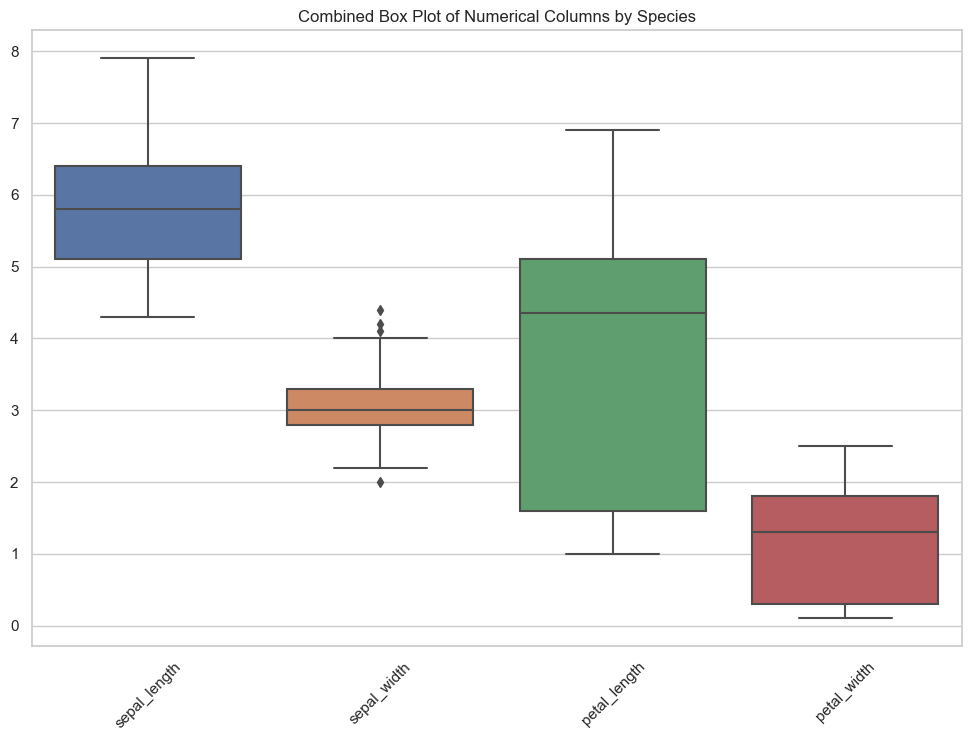

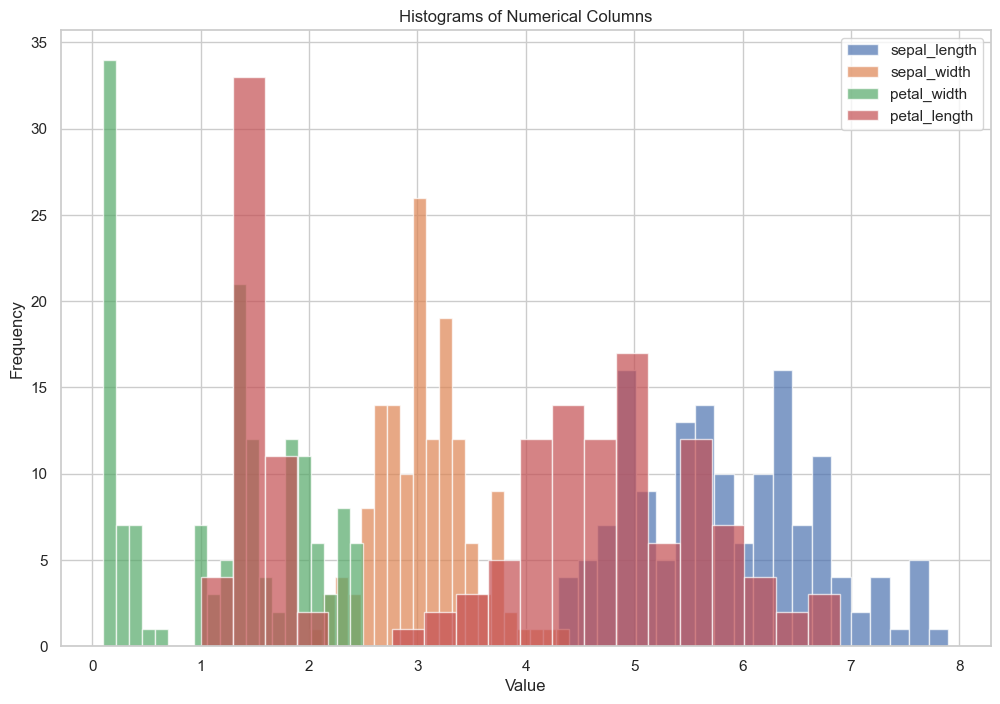

In [2]:
# Load the dataset
data = pd.read_csv('IRIS.csv')

# Selecting the numerical columns
numerical_columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length']

# Calculate mean, median, variance, and standard deviation for each numerical column
for column in numerical_columns:
    mean_value = data[column].mean()
    median_value = data[column].median()
    variance_value = data[column].var()
    std_deviation_value = data[column].std()
    print(f"Column: {column}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Variance: {variance_value:.2f}")
    print(f"Standard Deviation: {std_deviation_value:.2f}")
    print("-" * 20)

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a combined box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns='species'), orient='v')
plt.title("Combined Box Plot of Numerical Columns by Species")
plt.xticks(rotation=45)
plt.show()

# Select numerical columns
numerical_columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length']

# Create separate histogram plots
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.hist(data[column], bins=20, alpha=0.7, label=column)
plt.title("Histograms of Numerical Columns")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


       sepal_length   sepal_width  petal_length   petal_width  species_encoded
count  1.460000e+02  1.460000e+02    146.000000  1.460000e+02       146.000000
mean  -1.460019e-16  1.703356e-16      0.000000 -4.866731e-17         1.013699
std    1.003442e+00  1.003442e+00      1.003442  1.003442e+00         0.813560
min   -1.878815e+00 -2.477036e+00     -1.598666 -1.476216e+00         0.000000
25%   -9.137950e-01 -5.835949e-01     -1.255592 -1.211278e+00         0.000000
50%   -6.940215e-02 -1.102346e-01      0.345425  1.134155e-01         1.000000
75%    6.543631e-01  5.998059e-01      0.745679  7.757621e-01         2.000000
max    2.463776e+00  2.729927e+00      1.774904  1.703047e+00         2.000000


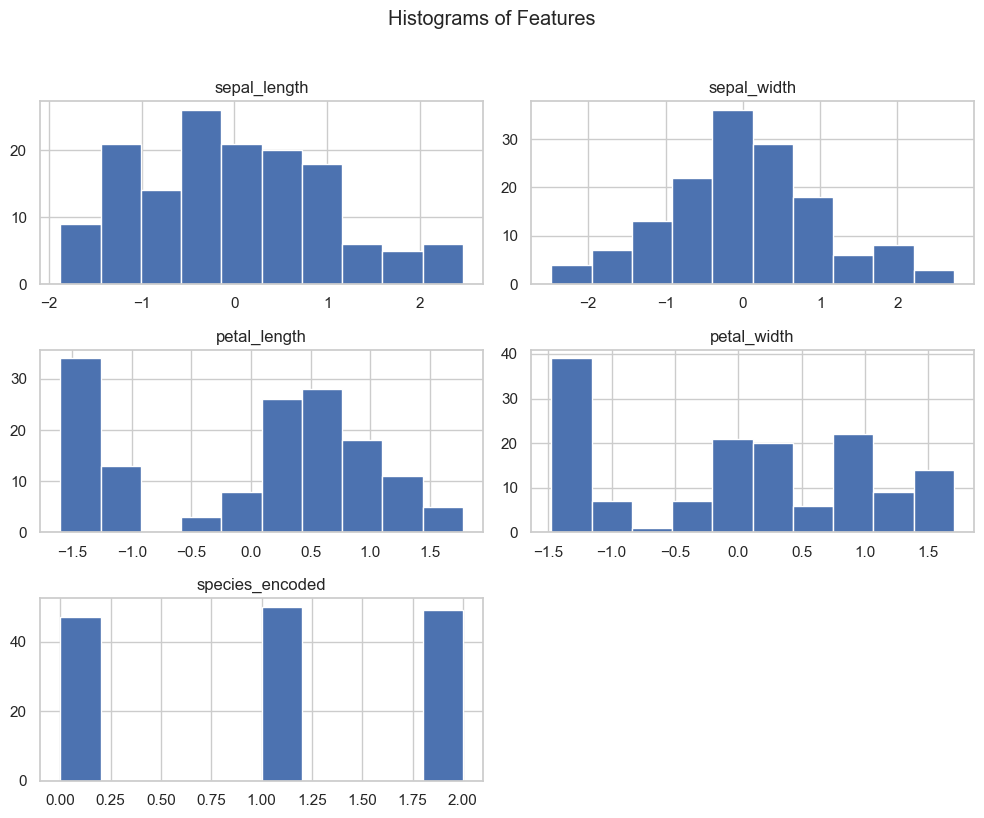

In [3]:
# Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual data file)
data = pd.read_csv('IRIS.csv')

# Remove duplicates
data = data.drop_duplicates()

# Handling missing values
data.dropna(inplace=True)

# Outlier detection and handling using Z-score method
def remove_outliers_zscore(data, columns, threshold=3):
    z_scores = np.abs((data[columns] - data[columns].mean()) / data[columns].std())
    data_no_outliers = data[(z_scores < threshold).all(axis=1)]
    return data_no_outliers

columns_to_check = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length']
data = remove_outliers_zscore(data, columns_to_check)

# Data transformation: Label encoding for 'species'
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Data transformation: Standard scaling for numerical columns
scaler = StandardScaler()
scaled_columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Describe cleaned data
data_description = data.describe()
print(data_description)

# Plot histograms
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Features", y=1.02)
plt.tight_layout()
plt.show()
